# Objective
<hr>

1. Finding the best data by replacing the NAN value from Data set by Different Approaches

2. Developing Simple Regression Model between  Age-Adjusted Death Rate and Lower 95% Confidence Interval for Death Rate
   Also between Lower 95% Confidence Interval for Death Rate and Upper 95% Confidence Interval for Death Rate
   for each Data obtained using Different Approaches.

3. finding R2 Score
<hr>

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
import matplotlib.pyplot as  plt
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from sklearn.metrics import r2_score
%matplotlib inline

**Importing CSV data**

In [2]:
df=pd.read_csv('share.csv')

In [3]:
#looking at dataset

df.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,**,**,**,**
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


*descriptive statistics of dataset*

In [4]:
df.describe()

,FIPS
count,3141.000000
mean,30392.281757
std,15158.200839
min,0.000000
25%,18179.000000
50%,29177.000000
75%,45081.000000
max,56045.000000


*Checking for NAN in DataSet*

In [5]:
df.isnull().sum()

County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

<br>

# Data preprocessing
<br>
<hr>

*Replacing * symbol for missing data with nan using regular Expression*

In [6]:
df=df.replace("\*+", np.nan, regex=True)

In [7]:
df.tail()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
3136,"Yakutat City and Borough, Alaska<sup>3</sup>",2282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3137,"Yukon-Koyukuk Census Area, Alaska",2290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3138,"Zapata County, Texas",48505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3139,"Zavala County, Texas",48507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3140,"Ziebach County, South Dakota",46137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*Again Checking for NAN in each Dataset*

In [8]:
df.isnull().sum()

County                                            0
FIPS                                              0
Met Objective of 45.5? (1)                      328
Age-Adjusted Death Rate                         328
Lower 95% Confidence Interval for Death Rate    328
Upper 95% Confidence Interval for Death Rate    328
Average Deaths per Year                         328
Recent Trend (2)                                447
Recent 5-Year Trend (2) in Death Rates          447
Lower 95% Confidence Interval for Trend         447
Upper 95% Confidence Interval for Trend         447
dtype: int64

## Approaches to deal with Missing data

<br>

#### Approach 1.- Replace NAN Values with 0

In [9]:
df0=df.replace(np.nan,"0")
df0.head()

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0,No,46,45.9,46.1,"1,57,376",falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18,stable,1.7,0,3.4
3,"North Slope Borough, Alaska",2185,No,124.9,73,194.7,5,0,0,0,0
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8,stable,2.2,-0.4,4.8


In [10]:
df0.isnull().sum()

County                                          0
FIPS                                            0
Met Objective of 45.5? (1)                      0
Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
Average Deaths per Year                         0
Recent Trend (2)                                0
Recent 5-Year Trend (2) in Death Rates          0
Lower 95% Confidence Interval for Trend         0
Upper 95% Confidence Interval for Trend         0
dtype: int64

**plot between Age-Adjusted Death Rate and Lower 95% Confidence Interval for Death Rate**

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


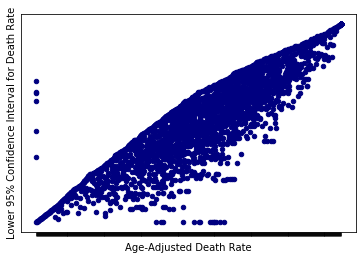

In [11]:
df0.plot(kind='scatter', x='Age-Adjusted Death Rate',y='Lower 95% Confidence Interval for Death Rate',color="navy")
ax = plt.axes()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

**plot between Lower 95% Confidence Interval for Death Rate and Upper 95% Confidence Interval for Death Rate**

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


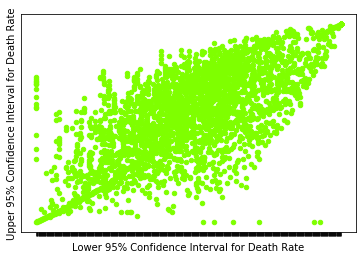

In [12]:
df0.plot(kind='scatter',x='Lower 95% Confidence Interval for Death Rate',y="Upper 95% Confidence Interval for Death Rate",color="chartreuse")
ax = plt.axes()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

### Approach 2:- Replace NAN with mean values for the columns with numeric data type

*making new data frame with only numeric columns*

In [13]:
dfn=df[["Age-Adjusted Death Rate","Lower 95% Confidence Interval for Death Rate","Upper 95% Confidence Interval for Death Rate"]]
dfn.tail()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate
3136,NaN,NaN,NaN
3137,NaN,NaN,NaN
3138,NaN,NaN,NaN
3139,NaN,NaN,NaN
3140,NaN,NaN,NaN


In [14]:
##**Feature Scaling**

In [15]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#dfn= sc.fit_transform(dfn)

**Imputing Missing Values with Simple Imputer**

In [16]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.NaN)
idf=pd.DataFrame(imp.fit_transform(dfn))
idf.columns=dfn.columns
idf.index=dfn.index


idf.isna().sum()

Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
dtype: int64

In [17]:
# looking at improved dataset
idf.tail()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate
3136,53.18514,42.795165,66.269499
3137,53.18514,42.795165,66.269499
3138,53.18514,42.795165,66.269499
3139,53.18514,42.795165,66.269499
3140,53.18514,42.795165,66.269499


**plot between Age-Adjusted Death Rate and Lower 95% Confidence Interval for Death Rate**

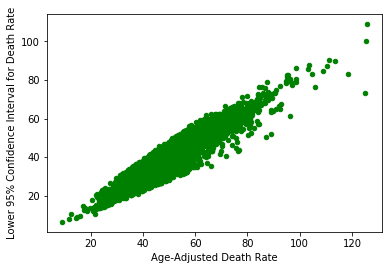

In [18]:
idf.plot(kind='scatter', x='Age-Adjusted Death Rate',y='Lower 95% Confidence Interval for Death Rate',color='green')
plt.show()

**plot between Lower 95% Confidence Interval for Death Rate and Upper 95% Confidence Interval for Death Rate**

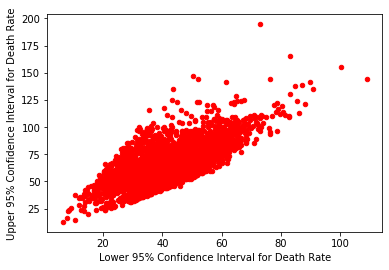

In [19]:
idf.plot(kind='scatter',x='Lower 95% Confidence Interval for Death Rate',y="Upper 95% Confidence Interval for Death Rate",color="red")
plt.show()

### Approach 3:- Replace NAN with median values for the columns with numeric data type

In [20]:
imp=SimpleImputer(missing_values=np.NaN,strategy='median')
idme=pd.DataFrame(imp.fit_transform(dfn))
idme.columns=dfn.columns
idme.index=dfn.index


idme.isna().sum()

Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
dtype: int64

In [21]:
idme.tail()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate
3136,52.6,42.9,64.0
3137,52.6,42.9,64.0
3138,52.6,42.9,64.0
3139,52.6,42.9,64.0
3140,52.6,42.9,64.0


**plot between Age-Adjusted Death Rate and Lower 95% Confidence Interval for Death Rate**

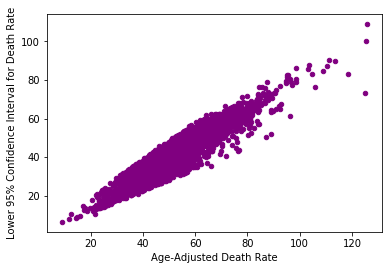

In [22]:
idme.plot(kind='scatter', x='Age-Adjusted Death Rate',y='Lower 95% Confidence Interval for Death Rate',color="purple")
plt.show()

**plot between Lower 95% Confidence Interval for Death Rate and Upper 95% Confidence Interval for Death Rate**

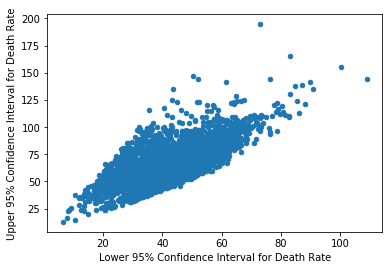

In [23]:
idme.plot(kind='scatter',x='Lower 95% Confidence Interval for Death Rate',y="Upper 95% Confidence Interval for Death Rate",)
plt.show()

### Approach 4:- Replace NAN with most frequent values for the columns with numeric data type

In [24]:
imp=SimpleImputer(missing_values=np.NaN,strategy='most_frequent')
idft=pd.DataFrame(imp.fit_transform(dfn))
idft.columns=dfn.columns
idft.index=dfn.index


idft.isna().sum()

Age-Adjusted Death Rate                         0
Lower 95% Confidence Interval for Death Rate    0
Upper 95% Confidence Interval for Death Rate    0
dtype: int64

In [25]:
idft.tail()

,Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate
3136,48.3,41.5,68.7
3137,48.3,41.5,68.7
3138,48.3,41.5,68.7
3139,48.3,41.5,68.7
3140,48.3,41.5,68.7


**plot between Age-Adjusted Death Rate and Lower 95% Confidence Interval for Death Rate**

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


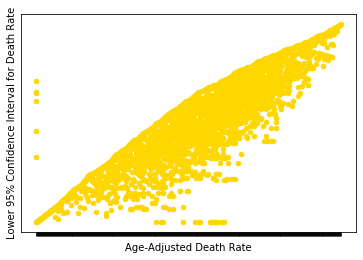

In [26]:
idft.plot(kind='scatter', x='Age-Adjusted Death Rate',y='Lower 95% Confidence Interval for Death Rate',color="gold")
ax = plt.axes()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

**plot between Lower 95% Confidence Interval for Death Rate and Upper 95% Confidence Interval for Death Rate**

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


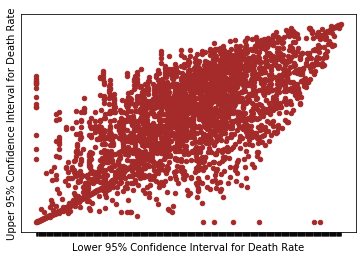

In [27]:
idft.plot(kind='scatter',x='Lower 95% Confidence Interval for Death Rate',y="Upper 95% Confidence Interval for Death Rate",color="brown")
ax = plt.axes()
ax.yaxis.set_major_locator(plt.NullLocator())
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.show()

<br>

# Model Development

<br>
<hr>

We will use Data obtained from <b>All above Approaches</b> after removing missing values ad try to find out the best model.

# 1

**Using data obtained from Approach 2**

*Defining x and y* for Age Adjusted death rate and lower 95% confidance interval for death Rate*

In [28]:
x=idf["Age-Adjusted Death Rate"].astype('float64').values
y=idf["Lower 95% Confidence Interval for Death Rate"].astype('float64').values

In [29]:
print("x shape =",x.shape)
print("y shape =",y.shape)

x shape = (3141,)
y shape = (3141,)


*Defining x0 and y0 for Lower 95% confidance interval for death rate and Upper 95% Confidence Interval for Death Rate*

In [30]:
x0=idf["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
y0=idf["Upper 95% Confidence Interval for Death Rate"].astype('float64').values
print("x0 shape =",x0.shape)
print("y0 shape =",y0.shape)

x0 shape = (3141,)
y0 shape = (3141,)


**Simple Linear regression manual Method**

<br>

*Model for input data as<b> 'Age Adjusted death rate'</b> and output data as ,<b>'lower 95% confidance interval for death Rate'</b>*

**finding slope and intercept**

In [31]:
x_mean=np.mean(x)
y_mean=np.mean(y)
n=len(x)
print("x mean = %.2f"%x_mean)
print("y mean= %.2f"%y_mean)
print("size of x =",n)
num=0
den=0
for i in range(n):
    num+=((x[i]-x_mean)*(y[i]-y_mean))
    den+=(x[i]-x_mean)**2
m=num/den  
c=y_mean-(m*x_mean)
print("slope =%.2f"%m)
print("intercept =%.2f"%c)  

x mean = 53.19
y mean= 42.80
size of x = 3141
slope =0.81
intercept =-0.45


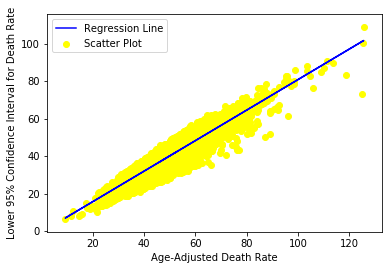

In [32]:
xmax=np.max(x)+100
xmin=np.min(x)+100
X=np.linspace(xmin,xmax,1000)
yhat=c+m*x
plt.plot(x,yhat,color="blue",label="Regression Line")
plt.scatter(x,y,color="yellow",label="Scatter Plot")
plt.xlabel("Age-Adjusted Death Rate")
plt.ylabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

*Accuracy*

In [33]:
rmse = sqrt(mean_squared_error(yhat, y))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y, yhat))

RMSE value = 4.56
R2 Score= 0.85


**Simple linear regression using Scikit-learn**
<br>

*Model for input data as<b> 'Age Adjusted death rate'</b> and output data as ,<b>'lower 95% confidance interval for death Rate'</b>*

In [34]:
x=x.reshape(-1, 1)
model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y, y_pred))

RMSE value = 4.56
R2 Score= 0.85


**Simple Linear regression manual Method**

<br>

*Model for input data as<b> 'Lower 95% Confidence Interval for Death Rate'</b> and output data as ,<b>'Upper 95% Confidence Interval for Death Rate'</b>*

In [35]:
x0_mean=np.mean(x0)
y0_mean=np.mean(y0)
n1=len(x0)
print("x0 mean = %.2f"%x0_mean)
print("y0 mean= %.2f"%y0_mean)
print("size of x0 =",n1)
num0=0
den0=0
for i in range(n1):
    num0+=((x0[i]-x0_mean)*(y0[i]-y0_mean))
    den0+=(x0[i]-x0_mean)**2
m0=num0/den0  
c0=y0_mean-(m0*x0_mean)
print("slope = %.2f"%m0)
print("intercept = %.2f"%c0) 

x0 mean = 42.80
y0 mean= 66.27
size of x0 = 3141
slope = 1.03
intercept = 22.07


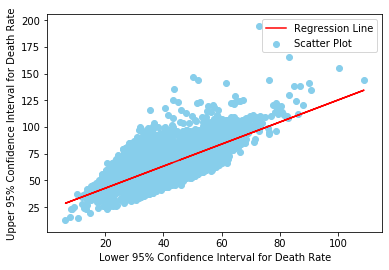

In [36]:
x0max=np.max(x0)+100
x0min=np.min(x0)+100
X0=np.linspace(x0min,x0max,1000)
y0hat=c0+m0*x0
plt.plot(x0,y0hat,color="red",label="Regression Line")
plt.scatter(x0,y0,color="skyblue",label="Scatter Plot")
plt.ylabel("Upper 95% Confidence Interval for Death Rate")
plt.xlabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

In [37]:
rmse = sqrt(mean_squared_error(y0hat, y0))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y0, y0hat))

RMSE value = 12.80
R2 Score= 0.47


**Simple Linear regression using scikit-learn**

<br>

*Model for input data as<b> 'Lower 95% Confidence Interval for Death Rate'</b> and output data as ,<b>'Upper 95% Confidence Interval for Death Rate'</b>*

In [38]:
x0=x0.reshape(-1, 1)
model = LinearRegression()
model.fit(x0,y0)
print("model coefficient= %.2f"%model.coef_)
print("model intercept= %.2f"%model.intercept_)
y0_pred = model.predict(x0)
rmse = np.sqrt(mean_squared_error(y0, y0_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y0, y0_pred))

model coefficient= 1.03
model intercept= 22.07
RMSE value = 12.80
R2 Score= 0.47


# 2

*using Data Obtained from <b>Approach 3</b>*

**Simple linear regression using Scikit-learn**
<br>

*Model for input data as<b> 'Age Adjusted death rate'</b> and output data as ,<b>'lower 95% confidance interval for death Rate'</b>*

In [39]:
x1=idme["Age-Adjusted Death Rate"].astype('float64').values
y1=idme["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
x1=x1.reshape(-1, 1)
model = LinearRegression()
model.fit(x1,y1)
y1_pred = model.predict(x1)
rmse = np.sqrt(mean_squared_error(y1, y1_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y1, y1_pred))

RMSE value = 4.57
R2 Score= 0.85


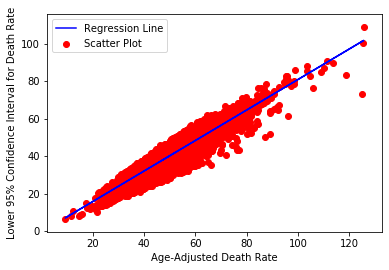

In [40]:
x1max=np.max(x1)+100
x1min=np.min(x1)+100
X1=np.linspace(x1min,x1max,1000)
plt.plot(x1,y1_pred,color="blue",label="Regression Line")
plt.scatter(x1,y1,color="red",label="Scatter Plot")
plt.xlabel("Age-Adjusted Death Rate")
plt.ylabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

**Simple Linear regression using scikit-learn**

<br>

*Model for input data as<b> 'Lower 95% Confidence Interval for Death Rate'</b> and output data as ,<b>'Upper 95% Confidence Interval for Death Rate'</b>*

In [41]:
x2=idme["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
y2=idme["Upper 95% Confidence Interval for Death Rate"].astype('float64').values
x2=x2.reshape(-1, 1)
model = LinearRegression()
model.fit(x2,y2)
y2_pred = model.predict(x2)
rmse = np.sqrt(mean_squared_error(y2, y2_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y2, y2_pred))

RMSE value = 12.82
R2 Score= 0.47


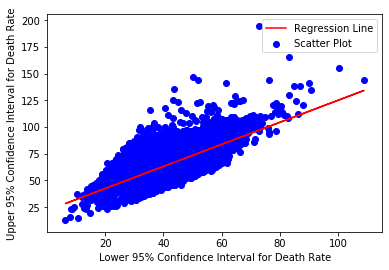

In [42]:
x2max=np.max(x2)+100
x2min=np.min(x2)+100
X2=np.linspace(x2min,x2max,1000)
plt.plot(x2,y2_pred,color="red",label="Regression Line")
plt.scatter(x2,y2,color="blue",label="Scatter Plot")
plt.ylabel("Upper 95% Confidence Interval for Death Rate")
plt.xlabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

# 3

*using Data Obtained from <b>Approach 1</b>*

**Simple linear regression using Scikit-learn**
<br>

*Model for input data as<b> 'Age Adjusted death rate'</b> and output data as ,<b>'lower 95% confidance interval for death Rate'</b>*

In [43]:
x1=df0["Age-Adjusted Death Rate"].astype('float64').values
y1=df0["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
x1=x1.reshape(-1, 1)
model = LinearRegression()
model.fit(x1,y1)
y1_pred = model.predict(x1)
rmse = np.sqrt(mean_squared_error(y1, y1_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y1, y1_pred))

RMSE value = 4.56
R2 Score= 0.93


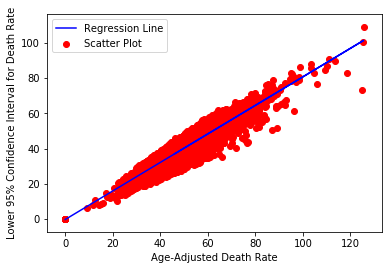

In [44]:
x1max=np.max(x1)+100
x1min=np.min(x1)+100
X1=np.linspace(x1min,x1max,1000)
plt.plot(x1,y1_pred,color="blue",label="Regression Line")
plt.scatter(x1,y1,color="red",label="Scatter Plot")
plt.xlabel("Age-Adjusted Death Rate")
plt.ylabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

**Simple Linear regression using scikit-learn**

<br>

*Model for input data as<b> 'Lower 95% Confidence Interval for Death Rate'</b> and output data as ,<b>'Upper 95% Confidence Interval for Death Rate'</b>*

In [45]:
x2=df0["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
y2=df0["Upper 95% Confidence Interval for Death Rate"].astype('float64').values
x2=x2.reshape(-1, 1)
model = LinearRegression()
model.fit(x2,y2)
y2_pred = model.predict(x2)
rmse = np.sqrt(mean_squared_error(y2, y2_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y2, y2_pred))

RMSE value = 13.57
R2 Score= 0.74


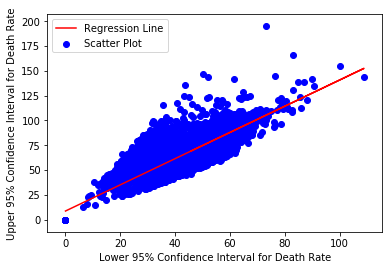

In [46]:
x2max=np.max(x2)+100
x2min=np.min(x2)+100
X2=np.linspace(x2min,x2max,1000)
plt.plot(x2,y2_pred,color="red",label="Regression Line")
plt.scatter(x2,y2,color="blue",label="Scatter Plot")
plt.ylabel("Upper 95% Confidence Interval for Death Rate")
plt.xlabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

# 4 
*using data obtained from <b>Approach 4</b>*

**Simple linear regression using Scikit-learn**
<br>

*Model for input data as<b> 'Age Adjusted death rate'</b> and output data as ,<b>'lower 95% confidance interval for death Rate'</b>*

In [47]:
x1=idft["Age-Adjusted Death Rate"].astype('float64').values
y1=idft["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
x1=x1.reshape(-1, 1)
model = LinearRegression()
model.fit(x1,y1)
y1_pred = model.predict(x1)
rmse = np.sqrt(mean_squared_error(y1, y1_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y1, y1_pred))

RMSE value = 4.64
R2 Score= 0.84


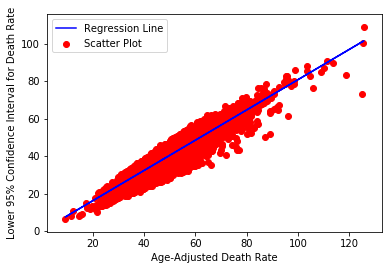

In [48]:
x1max=np.max(x1)+100
x1min=np.min(x1)+100
X1=np.linspace(x1min,x1max,1000)
plt.plot(x1,y1_pred,color="blue",label="Regression Line")
plt.scatter(x1,y1,color="red",label="Scatter Plot")
plt.xlabel("Age-Adjusted Death Rate")
plt.ylabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

**Simple Linear regression using scikit-learn**

<br>

*Model for input data as<b> 'Lower 95% Confidence Interval for Death Rate'</b> and output data as ,<b>'Upper 95% Confidence Interval for Death Rate'</b>*

In [49]:
x2=idft["Lower 95% Confidence Interval for Death Rate"].astype('float64').values
y2=idft["Upper 95% Confidence Interval for Death Rate"].astype('float64').values
x2=x2.reshape(-1, 1)
model = LinearRegression()
model.fit(x2,y2)
y2_pred = model.predict(x2)
rmse = np.sqrt(mean_squared_error(y2, y2_pred))
print("RMSE value = %.2f"%rmse)
print("R2 Score= %.2f"%r2_score(y2, y2_pred))

RMSE value = 12.85
R2 Score= 0.47


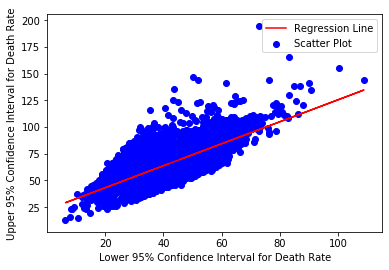

In [50]:
x2max=np.max(x2)+100
x2min=np.min(x2)+100
X2=np.linspace(x2min,x2max,1000)
plt.plot(x2,y2_pred,color="red",label="Regression Line")
plt.scatter(x2,y2,color="blue",label="Scatter Plot")
plt.ylabel("Upper 95% Confidence Interval for Death Rate")
plt.xlabel("Lower 95% Confidence Interval for Death Rate")
plt.legend()
plt.show()

# conclusion

<hr>

**<b>SLR</b> Model Obtained from all data get from different Approaches**<br><br><br>
**Accuracy obtained from Replacing the NAN value With <b>Zero</b>** 
<br>
**case 1**
<ol>
<li><b>RMSE value = 4.56</b>
<li><b>R2 Score= 0.85</b>
</ol>
<br>

**case 2**

<ol>
<li><b>RMSE value = 13.57</b>
<li><b>R2 Score= 0.74</b>
</ol>
<br>


**Accuracy obtained from mean data**
<br>

**case 1**

<ol>
<li><b>RMSE value = 4.56</b>
<li><b>R2 Score= 0.93</b>
</ol>
<br>

**case 2**

<ol>
<li><b>RMSE value = 12.80</b>
<li><b>R2 Score= 0.47</b>
</ol>
<br>


**Accuracy obtained from median data**

**case 1**

<ol>
<li><b>RMSE value = 4.57</b>
<li><b>R2 Score= 0.85</b>
</ol>
<br>

**case 2**

<ol>
<li><b>RMSE value = 12.82</b>
<li><b>R2 Score= 0.47</b>
</ol>
<br>

**Accuracy obtained from frequent data**

**case 1**

<ol>
<li><b>RMSE value = 4.64</b>
<li><b>R2 Score= 0.84</b>
</ol>
<br>

**case 2**

<ol>
<li><b>RMSE value = 12.85</b>
<li><b>R2 Score= 0.47</b>
</ol>
<br>

<hr>

### Work by Sarvesh Kumar Sharma

<hr>